### My solution to homework_01

The first step is to import the book Adventures of Huckleberry Finn, by Mark Twain with the next code

In [1]:
from urllib.request import urlopen
contents = urlopen("https://www.gutenberg.org/files/76/76-0.txt").read().decode('utf-8')

We proceed to replace all the punctuation signs with spaces using the propertie "translate"

In [2]:
punctuation = '!"#$%&\'()*+,--./:”;“<=>?@[\\]^_`{|}~'
P_contents = contents.translate(str.maketrans(' ',' ',punctuation))

Next thing to do is to lowercase all the text

In [3]:
p_contents = P_contents.lower()

Now, we create a list that has all chapter indicators and use it to create a dictionary that containes the individual chapters, with a proper indicator. 

In [4]:
chapters = ['chapter i\r', 'chapter ii\r', 'chapter iii\r','chapter iv\r','chapter v\r','chapter vi\r','chapter vii\r','chapter viii\r','chapter ix\r','chapter x\r','chapter xi\r','chapter xii\r','chapter xiii\r','chapter xiv\r','chapter xv\r','chapter xvi\r','chapter xvii\r','chapter xviii\r','chapter xix\r','chapter xx\r','chapter xxi\r','chapter xxii\r','chapter xxiii\r','chapter xxiv\r','chapter xxv\r','chapter xxvi\r','chapter xxvii\r','chapter xxviii\r','chapter xxix\r','chapter xxx\r','chapter xxxi\r','chapter xxxii\r','chapter xxxiii\r','chapter xxxiv\r','chapter xxxv\r','chapter xxxvi\r','chapter xxxvii\r','chapter xxxviii\r','chapter xxxix\r','chapter xl\r','chapter xli\r','chapter xlii\r','chapter the last\r', '\n end' ]

In [5]:
d = {}

for i in range(len(chapters)-1):
    d['chapter{0}'.format(i)] = p_contents[p_contents.find(chapters[i])+len(chapters[i]):p_contents.rfind(chapters[i+1])]

We modify the dictionary to replace all the line breaks with spaces

In [6]:
q = {}

for i in range(len(chapters)-1):
    q['chapter{0}'.format(i)] = d['chapter{0}'.format(i)].replace('\r',' ')
    q['chapter{0}'.format(i)] = q['chapter{0}'.format(i)].replace('\n',' ')

Empty lists are created that then are filled with the appearances of the characters in each chapter, these appearances are obtained by the use of the property count.

In [8]:
jim, tom, huck = [], [], []

for i in range(len(chapters)-1):
    jim.append(q['chapter{0}'.format(i)].count(' jim '))
    tom.append(q['chapter{0}'.format(i)].count(' tom '))
    huck.append(q['chapter{0}'.format(i)].count(' huck '))

We create a pandas DataFrame with the desired structure 

In [13]:
import pandas as pd

count = pd.DataFrame()

count['Jim'] = jim
count['Tom'] = tom
count['Huck'] = huck

count = count.T

In [29]:
header = ['chapter i', 'chapter ii', 'chapter iii','chapter iv','chapter v','chapter vi','chapter vii','chapter viii','chapter ix','chapter x','chapter xi','chapter xii','chapter xiii','chapter xiv','chapter xv','chapter xvi','chapter xvii','chapter xviii','chapter xix','chapter xx','chapter xxi','chapter xxii','chapter xxiii','chapter xxiv','chapter xxv','chapter xxvi','chapter xxvii','chapter xxviii','chapter xxix','chapter xxx','chapter xxxi','chapter xxxii','chapter xxxiii','chapter xxxiv','chapter xxxv','chapter xxxvi','chapter xxxvii','chapter xxxviii','chapter xxxix','chapter xl','chapter xli','chapter xlii','chapter the last']
count.columns = header

In [48]:
display(count)

,chapter i,chapter ii,chapter iii,chapter iv,chapter v,chapter vi,chapter vii,chapter viii,chapter ix,chapter x,...,chapter xxxiv,chapter xxxv,chapter xxxvi,chapter xxxvii,chapter xxxviii,chapter xxxix,chapter xl,chapter xli,chapter xlii,chapter the last
Jim,0,15,0,8,0,0,0,22,11,18,...,14,13,17,3,23,7,11,0,12,6
Tom,5,23,5,0,0,0,2,2,0,0,...,15,14,18,9,30,11,9,6,26,5
Huck,0,2,2,0,0,2,0,5,1,0,...,4,8,1,0,2,0,3,0,2,3


We then save the DataFrame to a CSV file, and import that file to a new DataFrame

In [30]:
count.to_csv('Names.csv')

In [35]:
df = pd.read_csv('Names.csv',index_col=0)

In [49]:
display(df)

,chapter i,chapter ii,chapter iii,chapter iv,chapter v,chapter vi,chapter vii,chapter viii,chapter ix,chapter x,...,chapter xxxiv,chapter xxxv,chapter xxxvi,chapter xxxvii,chapter xxxviii,chapter xxxix,chapter xl,chapter xli,chapter xlii,chapter the last
Jim,0,15,0,8,0,0,0,22,11,18,...,14,13,17,3,23,7,11,0,12,6
Tom,5,23,5,0,0,0,2,2,0,0,...,15,14,18,9,30,11,9,6,26,5
Huck,0,2,2,0,0,2,0,5,1,0,...,4,8,1,0,2,0,3,0,2,3


We extract the appearances to lists, and then obtain the accumulated sum, the way is suggested in the homework

In [39]:
Jim2 = df.loc['Jim'].values.tolist()
Tom2 = df.loc['Tom'].values.tolist()
Huck2 = df.loc['Huck'].values.tolist()


In [42]:
import numpy as np

Jim_cumsum=np.cumsum(np.array(Jim2))
Tom_cumsum=np.cumsum(np.array(Tom2))
Huck_cumsum=np.cumsum(np.array(Huck2))

Finally, we show a plot that shows how is the evolution in the appearance of the characters

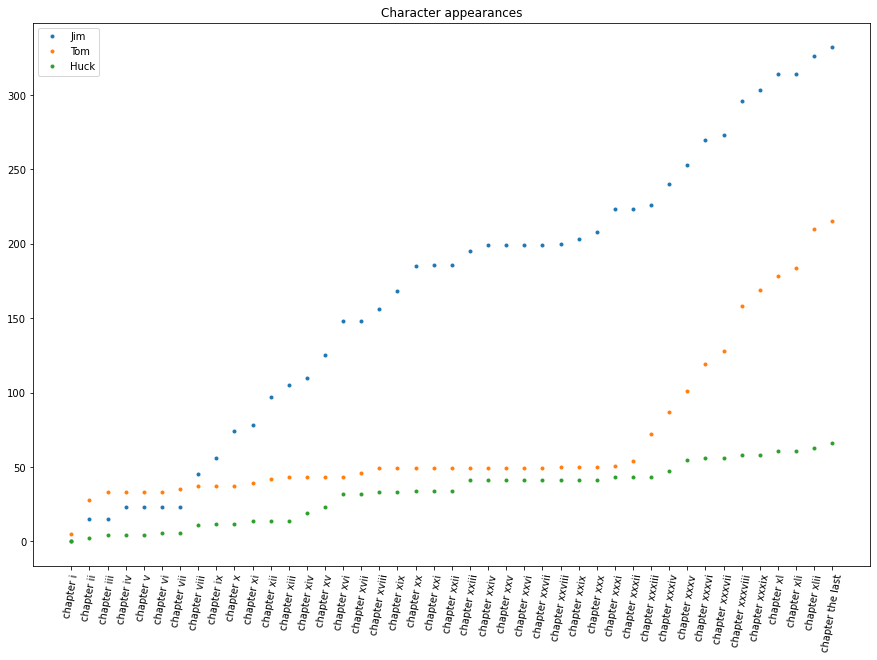

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.plot(header, Jim_cumsum, '.',label = 'Jim')
plt.plot(header, Tom_cumsum, '.',label = 'Tom')
plt.plot(header, Huck_cumsum, '.',label = 'Huck')
plt.xticks(rotation=80)
plt.title('Character appearances')
plt.legend()
plt.show()